In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import scipy as sp
import json
import glob
import os
from omegaconf import OmegaConf

import matplotlib.pyplot as plt
import pathlib
from matplotlib import cm
plt.style.use('bmh')
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['legend.loc'] = 'lower right'
plt.rcParams['figure.facecolor'] = '#FFFFFF'

In [6]:
df = pd.read_csv('dmc_dreamer_bench.csv')

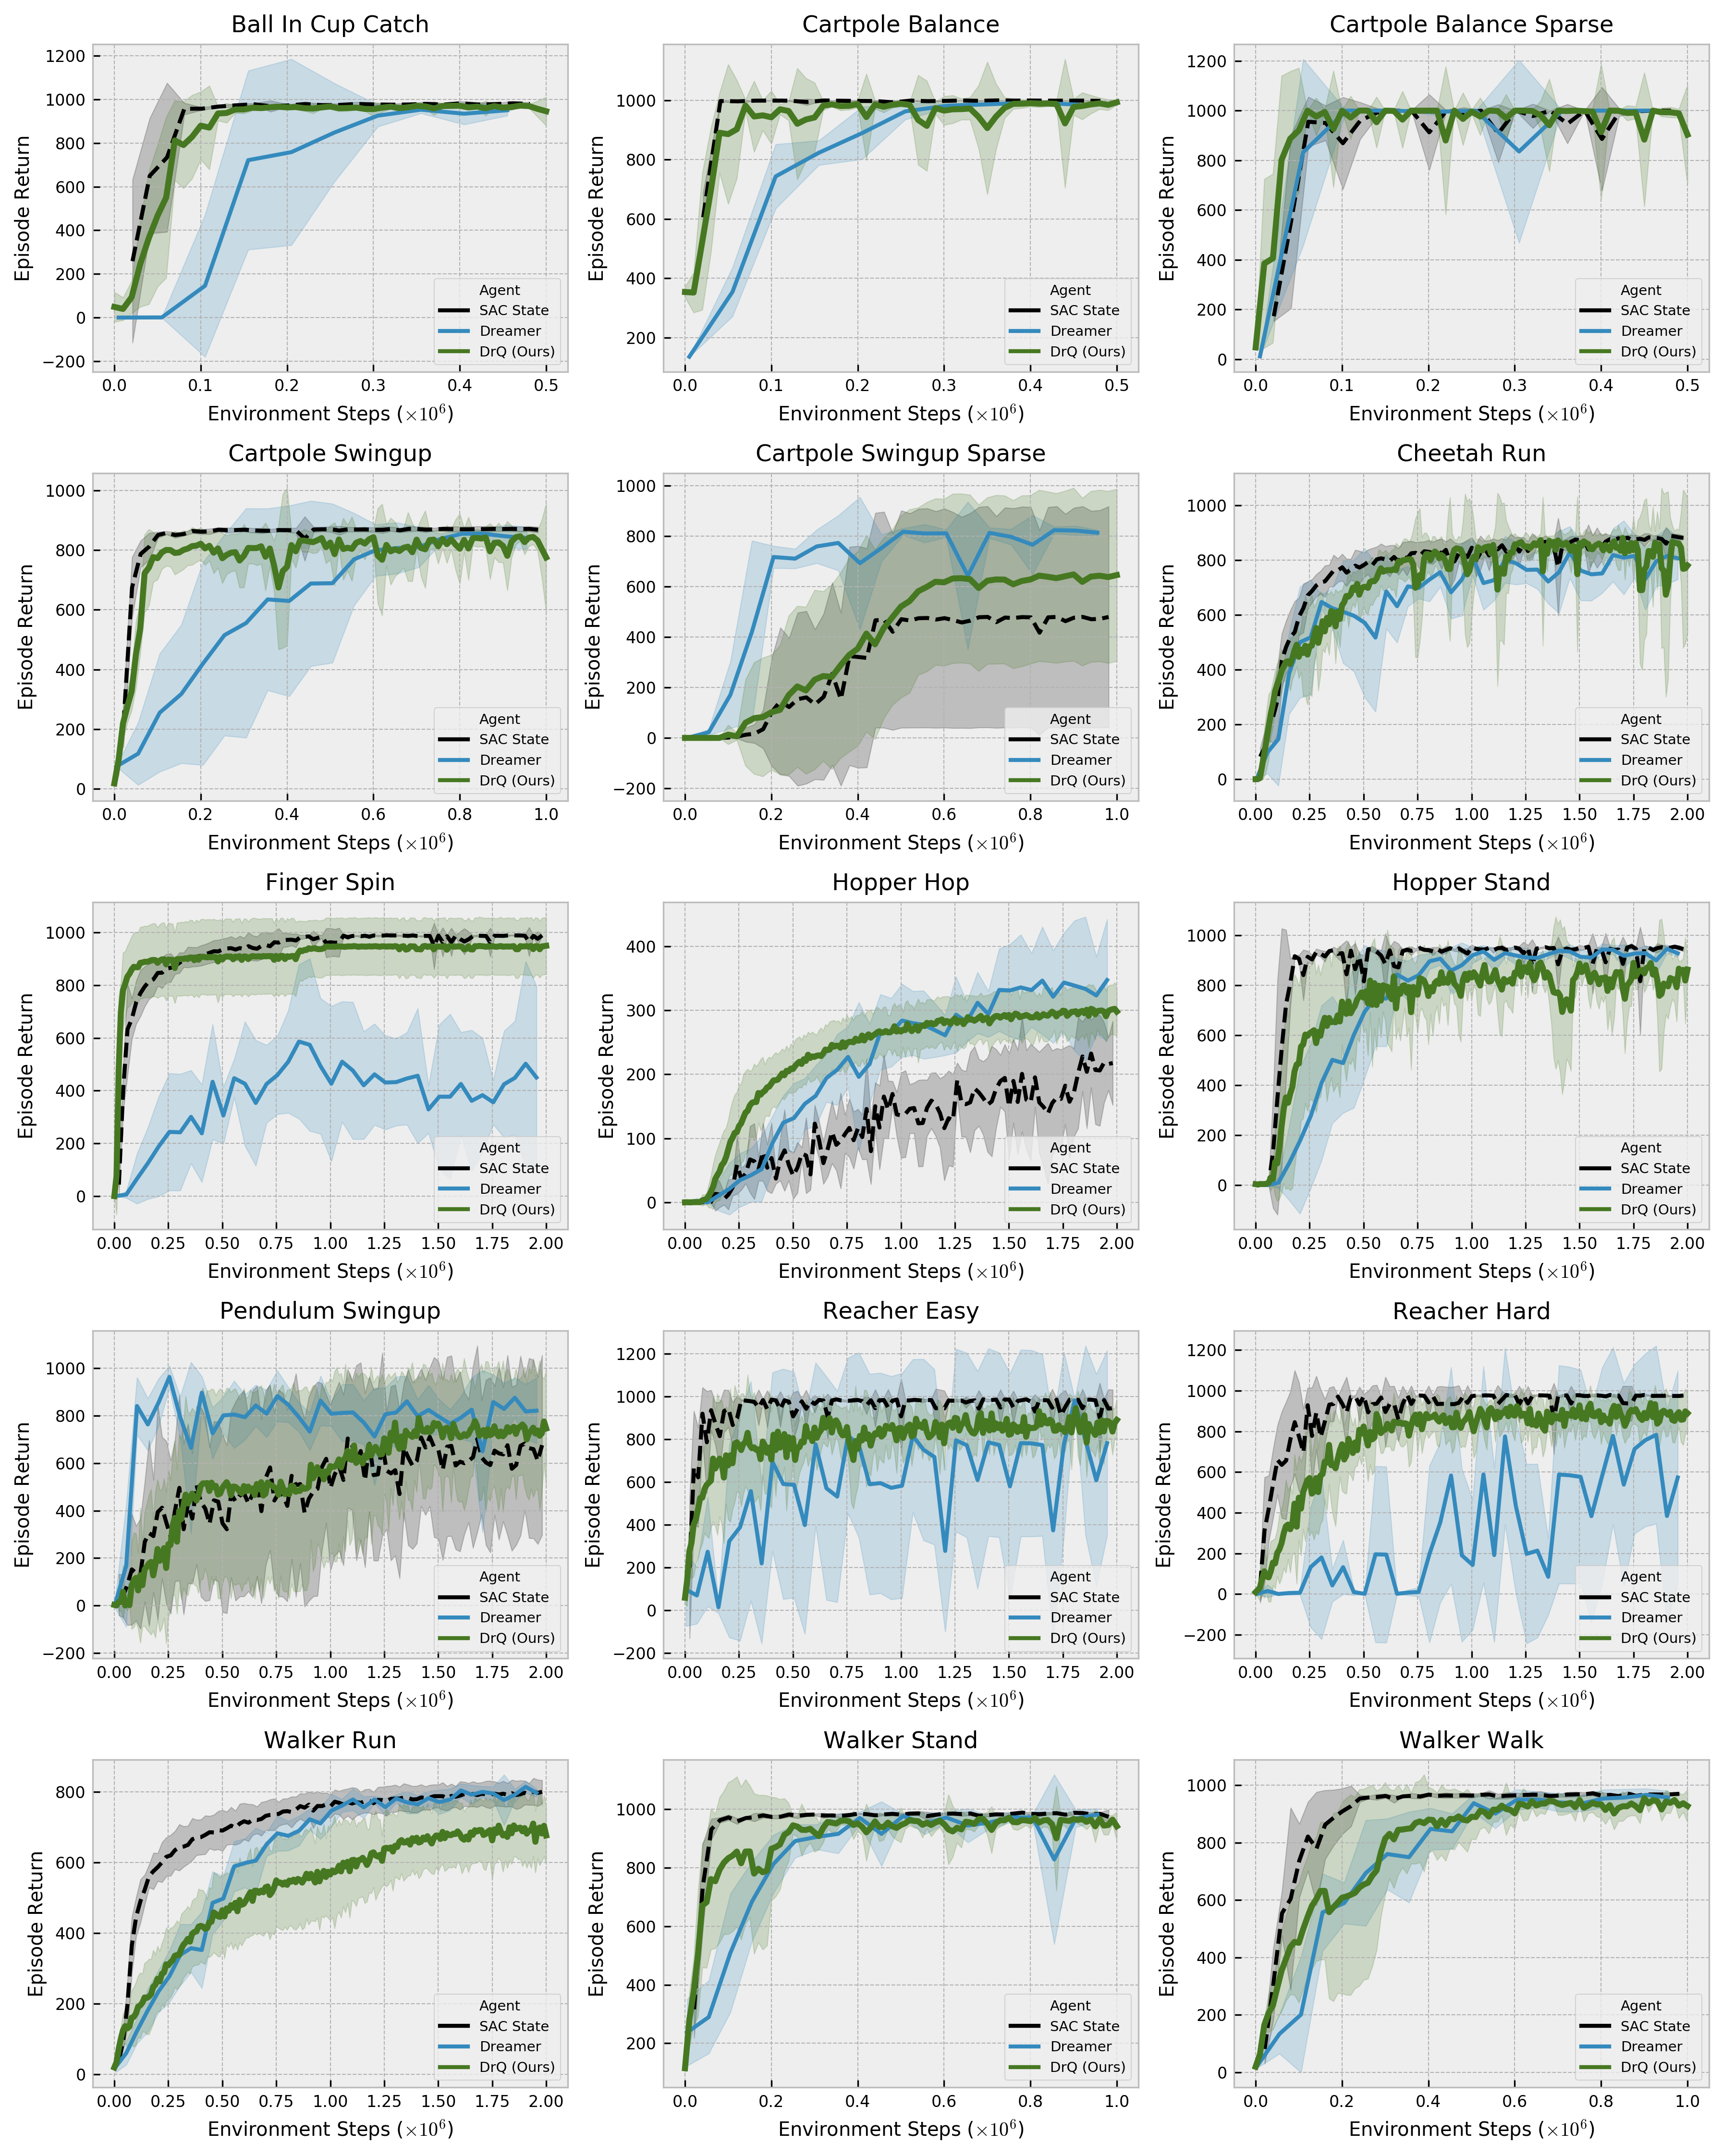

In [119]:
envs = sorted([
    'cartpole_balance',
    'cartpole_balance_sparse',
    'cartpole_swingup',
    'cartpole_swingup_sparse',
    'cheetah_run',
    'ball_in_cup_catch',
    'finger_spin',
    'hopper_hop',
    'hopper_stand',
    'pendulum_swingup',
    'reacher_easy',
    'reacher_hard',
    'walker_run',
    'walker_stand',
    'walker_walk',
])


env_names = dict()
for env in envs:
    p = [x.capitalize() for x in env.split('_')]
    env_names[env] = ' '.join(p)

cutoff = {
    'acrobot_swingup': 2000,
    'cartpole_balance': 500,
    'cartpole_balance_sparse': 500,
    'cartpole_swingup': 1000,
    'cartpole_swingup_sparse': 1000,
    'cheetah_run': 2000,
    'ball_in_cup_catch': 500,
    'finger_spin': 2000,
    'finger_turn_easy': 2000,
    'finger_turn_hard': 2000,
    'hopper_hop': 2000,
    'hopper_stand': 2000,
    'pendulum_swingup': 2000,
    'quadruped_run': 2000,
    'quadruped_walk': 2000,
    'reacher_easy': 2000,
    'reacher_hard': 2000,
    'walker_run': 2000,
    'walker_stand': 1000,
    'walker_walk': 1000
}


dfs = [
    dreamer_df,
]
    



exp_dirs = [
    '../exp/2020.04.23/174813_sac_reg_dreamer_bsz512_ar2',
]
df = load_experiment(exp_dirs, ty='eval')
df = df[df['env'] != 'cartpole_swingup_sparse']
df['Agent'] = 'DrQ (Ours)'
dfs.append(df)

exp_dirs = [
    '../exp/2020.04.25/212608_drq_dreamer_bsz512_ar2_log_alpha',
]
df = load_experiment(exp_dirs, ty='eval')
df['Agent'] = 'DrQ (bsz=512,ar=2)'
#dfs.append(df)

exp_dirs = [
    '../exp/2020.04.25/212631_drq_dreamer_bsz256_ar2_log_alpha',
]
df = load_experiment(exp_dirs, ty='eval')
df['Agent'] = 'DrQ (bsz=256,ar=2)'
#dfs.append(df)

exp_dirs = [
    '../exp/2020.04.25/212646_drq_dreamer_bsz128_ar2_log_alpha',
]
df = load_experiment(exp_dirs, ty='eval')
df['Agent'] = 'DrQ (bsz=128,ar=2)'
#dfs.append(df)


exp_dirs = [
    '../../representation_learning/exp/2020.04.05/134248_sac_tfsac_bench',
]
df = load_experiment(exp_dirs, ty='eval')
df['Agent'] = 'SAC State'
dfs.append(df)




exp_dirs = [
    '../exp/2020.04.24/204234_drq_dreamer_bsz128_ar4',
]
df = load_experiment(exp_dirs, ty='eval')
df = df[df['env'] == 'cartpole_swingup_sparse']
df['Agent'] = 'DrQ (Ours)'
dfs.append(df)

df = pd.concat(dfs, sort=False)

for i in [79, 117, 119, 120, 122, 124, 173, 175, 178, 185, 190]:
    df = df[df['run_id'] != f'run={i}']


ncol = 3
nrow = (len(envs) + ncol - 1) // ncol

fig, axs = plt.subplots(nrow, ncol, figsize=(4 * ncol, 3 * nrow))
hue_order = ['SAC State', 'Dreamer', 'DrQ (Ours)']

df['true_step'] = df['episode'] * 0.001

cp = sns.color_palette()
palette = [(0.0, 0.0, 0.0)] + [cp[0]] + [cp[3]]

for idx, env in enumerate(envs):
    data = df[df['env'] == env]
    data = data[data['episode'] <= cutoff[env]]
    row = idx // ncol
    col = idx % ncol
    ax = axs[row, col]
    sns.lineplot(x='true_step', y='episode_reward', data=data, ci='sd', hue='Agent', hue_order=hue_order, ax=ax, palette=palette)
    ax.lines[0].set_linestyle('--')
    ax.lines[2].set_linewidth(3)
    #ax.lines[0].set_color('black')
    ax.set_xlabel('Environment Steps ($\\times 10^6%$)')
    ax.set_ylabel('Episode Return')
    ax.set_title(f'{env_names[env]}')
    
   
    
    
    
plt.tight_layout()
plt.show()
fig.savefig('pdfs/dreamer_bench.pdf', dpi=300,  bbox_inches='tight')
#fig.savefig('pdfs/dreamer_bench.png', dpi=300,  bbox_inches='tight')
df.to_csv('csvs/dreamer_bench.csv')

In [96]:
x = df[(df['env'] == 'walker_walk') & (df['Agent'] == 'DrQ (Ours)')]

In [108]:
x[x['seed'] == str(1)][['episode', 'episode_reward', 'run_id', 'seed']][:20]

,episode,episode_reward,run_id,seed
0,0.0,21.447546,run=190,1
1,10.0,148.527264,run=190,1
2,20.0,220.754497,run=190,1
3,30.0,264.307070,run=190,1
4,40.0,282.256533,run=190,1
5,50.0,416.961526,run=190,1
6,60.0,374.328499,run=190,1
7,70.0,478.235278,run=190,1
8,80.0,435.959153,run=190,1
9,90.0,530.383351,run=190,1
